In [25]:
%matplotlib inline

In [4]:
import pandas as pd
reviews = pd.read_pickle("reviews.pickle")
products = pd.read_pickle("products.pickle")

In [3]:
train = reviews.sample(frac=.8)
test = reviews.drop(train.index)

In [78]:
from scipy.stats import zscore
products['avgrating'] = reviews.groupby('asin').overall.mean()
products['good'] = products.avgrating > 4.5
products['nreviews'] = reviews.asin.value_counts()
products = products.dropna(subset=["price"])
products['ratingZ'] = zscore(products.avgrating)
products['priceZ'] = zscore(products.price)
products.head()


,brand,categories,description,imUrl,price,related,salesRank,title,avgrating,good,ratingZ,priceZ,nreviews
asin,,,,,,,,,,,,,
9742356831,Mae Ploy,[[Grocery & Gourmet Food]],Used to make various curry soups and stir fry ...,http://ecx.images-amazon.com/images/I/41pQp67A...,7.23,"{'bought_together': ['B000EI2LLO', 'B000EICISA...",{'Grocery & Gourmet Food': 3434},Mae Ploy Thai Green Curry Paste - 14 oz jar,4.733333,True,0.745197,-1.133104,15
B00004S1C5,HIC Harold Import Co.,"[[Grocery & Gourmet Food, Cooking & Baking, Fo...","From Easter eggs to colorful cookies, Spectrum...",http://ecx.images-amazon.com/images/I/41F75K9F...,9.76,"{'bought_together': ['B0000CFMLT'], 'also_boug...",{'Kitchen & Dining': 4494},"Ateco Food Coloring Kit, 6 colors",4.142857,False,-0.499066,-0.953205,7
B0000531B7,Powerbar,[[Grocery & Gourmet Food]],,http://ecx.images-amazon.com/images/I/519SuVj1...,24.75,"{'bought_together': ['B009VV7G60', 'B00DZGEY44...",{'Grocery & Gourmet Food': 2858},"PowerBar Harvest Energy Bars, Double Chocolate...",4.555556,True,0.370581,0.112679,9
B00005344V,Traditional Medicinals,[[Grocery & Gourmet Food]],"For nearly forty years, we&#x2019;ve been pass...",http://ecx.images-amazon.com/images/I/51H54cd-...,21.74,"{'bought_together': ['B0009F3POO', 'B0009F3POE...",{'Grocery & Gourmet Food': 5034},"Traditional Medicinals Breathe Easy, 16-Count ...",4.428571,False,0.102997,-0.101351,7
B00005C2M2,American Outdoor Products,[[Grocery & Gourmet Food]],Funkyfoodshop is the #1 seller of space food o...,http://ecx.images-amazon.com/images/I/518Pt3s4...,23.50,"{'bought_together': ['B000JUFD8U', 'B00005C2M3...",{},American Outdoor Products Astronaut Ice Cream ...,5.000000,True,1.307123,0.023796,7


In [45]:
train = products.sample(frac=.8)
test = products.drop(train.index)

In [57]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(1)

In [89]:
knnm = knn.fit(products[["price", "nreviews"]], products.good)
knnm

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [20]:
predictions = knn.predict(test[["avgrating", "price"]])

In [61]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [83]:
import numpy as np
xs, ys = np.arange(0, 160, 1), np.arange(0, 800, 1)

In [84]:
xx,yy = np.meshgrid(xs, ys)

In [71]:
np.c_[xx.ravel(), yy.ravel()]

array([[1, 1],
       [2, 1],
       [3, 1],
       [4, 1],
       [5, 1],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 2],
       [1, 3],
       [2, 3],
       [3, 3],
       [4, 3],
       [5, 3],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4],
       [5, 4],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [5, 5]])

In [90]:
points = np.c_[xx.ravel(), yy.ravel()]
z = knnm.predict(points)
z

array([ True, False,  True, ..., False, False, False], dtype=bool)

In [91]:
z = z.reshape(xx.shape)
z

array([[ True, False,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [63]:
x = False
int(x)

0

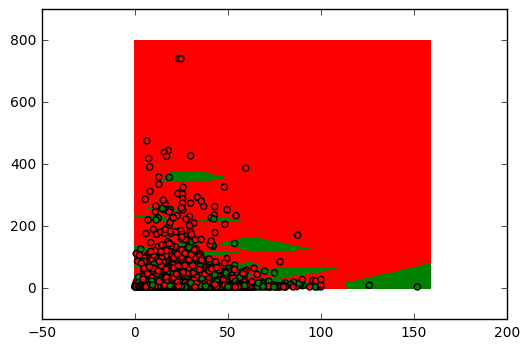

In [92]:
plt.pcolormesh(xx, yy, z, cmap=ListedColormap(["red", "green"]))
plt.scatter(products.price, products.nreviews, c=products.good,
            cmap=ListedColormap(["red", "green"]))
#plt.xlim(-4, 1); plt.ylim(-1, 4);

In [93]:
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,616719923X,"[0, 0]",4.0,Just another flavor of Kit Kat but the taste i...,"06 1, 2013",A1VEELTKS8NLZB,Amazon Customer,Good Taste,1370044800
1,616719923X,"[0, 1]",3.0,I bought this on impulse and it comes from Jap...,"05 19, 2014",A14R9XMZVJ6INB,amf0001,"3.5 stars, sadly not as wonderful as I had hoped",1400457600
2,616719923X,"[3, 4]",4.0,Really good. Great gift for any fan of green t...,"10 8, 2013",A27IQHDZFQFNGG,Caitlin,Yum!,1381190400
3,616719923X,"[0, 0]",5.0,"I had never had it before, was curious to see ...","05 20, 2013",A31QY5TASILE89,DebraDownSth,Unexpected flavor meld,1369008000
4,616719923X,"[1, 2]",4.0,I've been looking forward to trying these afte...,"05 26, 2013",A2LWK003FFMCI5,Diana X.,"Not a very strong tea flavor, but still yummy ...",1369526400


In [21]:
predictions == test.good

asin
B0000CCZYY     True
B0000CDBQN     True
B0000CFLIL     True
B0000CNU15     True
B0000DANYR     True
B0000DD8V3     True
B0000DGDMO    False
B0000E5JIU     True
B0000GH6UG     True
B0000V8IOE     True
B0000YVCI0     True
B000144GWS     True
B00014CZP8     True
B00014HS2S     True
B0001590IC     True
B00016JGZI     True
B00016LA7K     True
B00016LA8E     True
B00016UX1E     True
B00016UX0K     True
B00016XJM4     True
B00017028M     True
B000173IHE     True
B00017LF24     True
B0001AVRRE    False
B0001CXRL6     True
B0001CXUH2     True
B0001DMTPU     True
B0001DMTJG     True
B0001EQN88     True
              ...  
B00DF0KXYK     True
B00DGPCI56     True
B00DHETWR8     True
B00DILCU92     True
B00DM07VHA     True
B00DRA8HWI     True
B00DUQDIJG     True
B00E0C6NCI     True
B00E0WB292     True
B00E9HKMSU     True
B00EKR4M8K     True
B00ENBP2VE     True
B00EO59U7G    False
B00EPTYHGA     True
B00ERWVI8A     True
B00F9VCQ2A     True
B00FB5CUY8     True
B00FKZ5TL0     True
B00FMFJ2LG     

In [94]:
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,616719923X,"[0, 0]",4.0,Just another flavor of Kit Kat but the taste i...,"06 1, 2013",A1VEELTKS8NLZB,Amazon Customer,Good Taste,1370044800
1,616719923X,"[0, 1]",3.0,I bought this on impulse and it comes from Jap...,"05 19, 2014",A14R9XMZVJ6INB,amf0001,"3.5 stars, sadly not as wonderful as I had hoped",1400457600
2,616719923X,"[3, 4]",4.0,Really good. Great gift for any fan of green t...,"10 8, 2013",A27IQHDZFQFNGG,Caitlin,Yum!,1381190400
3,616719923X,"[0, 0]",5.0,"I had never had it before, was curious to see ...","05 20, 2013",A31QY5TASILE89,DebraDownSth,Unexpected flavor meld,1369008000
4,616719923X,"[1, 2]",4.0,I've been looking forward to trying these afte...,"05 26, 2013",A2LWK003FFMCI5,Diana X.,"Not a very strong tea flavor, but still yummy ...",1369526400


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(min_df=10)
dtm = c.fit_transform(reviews.reviewText)
dtm

<151254x15851 sparse matrix of type '<class 'numpy.int64'>'
	with 9064073 stored elements in Compressed Sparse Row format>

In [108]:
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB()
f = nbc.fit(dtm, reviews.overall > 4)

In [109]:
predictions = nbc.predict(dtm)

In [111]:
pd.crosstab(predictions, reviews.overall>4)

overall,False,True
row_0,,
False,46932,14003
True,16876,73443


In [113]:
# Sentiment Analysis

train = reviews.sample(frac=.8)
test = reviews.drop(train.index)
                      

In [114]:
c = CountVectorizer(min_df=10)
dtm = c.fit_transform(train.reviewText)


In [118]:
dtm

<121003x14354 sparse matrix of type '<class 'numpy.int64'>'
	with 7250962 stored elements in Compressed Sparse Row format>

In [116]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
dtm_train = tfidf.fit_transform(dtm)

In [117]:
nbc = MultinomialNB()
f = nbc.fit(dtm_train, train.overall > 4)

In [121]:
# predict on test data

dtm_test = c.transform(test.reviewText)
dtm_test = tfidf.transform(dtm_test)

In [122]:
dtm_test

<30251x14354 sparse matrix of type '<class 'numpy.float64'>'
	with 1796491 stored elements in Compressed Sparse Row format>

In [123]:
predictions = f.predict(dtm_test)

In [125]:
from sklearn import metrics
print(metrics.classification_report(test.overall > 4, predictions, target_names=["Bad", "Good"]))

             precision    recall  f1-score   support

        Bad       0.79      0.60      0.68     12784
       Good       0.75      0.89      0.81     17467

avg / total       0.77      0.77      0.76     30251

